#### **Frequent Itemset mining technique for Basket Analysis in simple Point of Sale dataset**
See https://www.edureka.co/blog/apriori-algorithm/

Dataset POS_data.csv from Kaggle 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = './data/POS_data.csv'
df = pd.read_csv(file, header=0)
df

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


In [3]:
# We create a new column time_stamp and two dataframes (one per year)
df['Time_stamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df_2016 = df[df['Time_stamp'].dt.year == 2016]
df_2017 = df[df['Time_stamp'].dt.year == 2017]

In [4]:
df.head(10)

,Date,Time,Transaction,Item,Time_stamp
0,10/30/2016,9:58:11,1,Bread,2016-10-30 09:58:11
1,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,10/30/2016,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,10/30/2016,10:07:57,3,Jam,2016-10-30 10:07:57
5,10/30/2016,10:07:57,3,Cookies,2016-10-30 10:07:57
6,10/30/2016,10:08:41,4,Muffin,2016-10-30 10:08:41
7,10/30/2016,10:13:03,5,Coffee,2016-10-30 10:13:03
8,10/30/2016,10:13:03,5,Pastry,2016-10-30 10:13:03
9,10/30/2016,10:13:03,5,Bread,2016-10-30 10:13:03


In [5]:
num_products = df.Item.nunique()
print('There are', num_products, 'unique products')

There are 95 unique products


In [6]:
products = df.Item.unique()
products

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

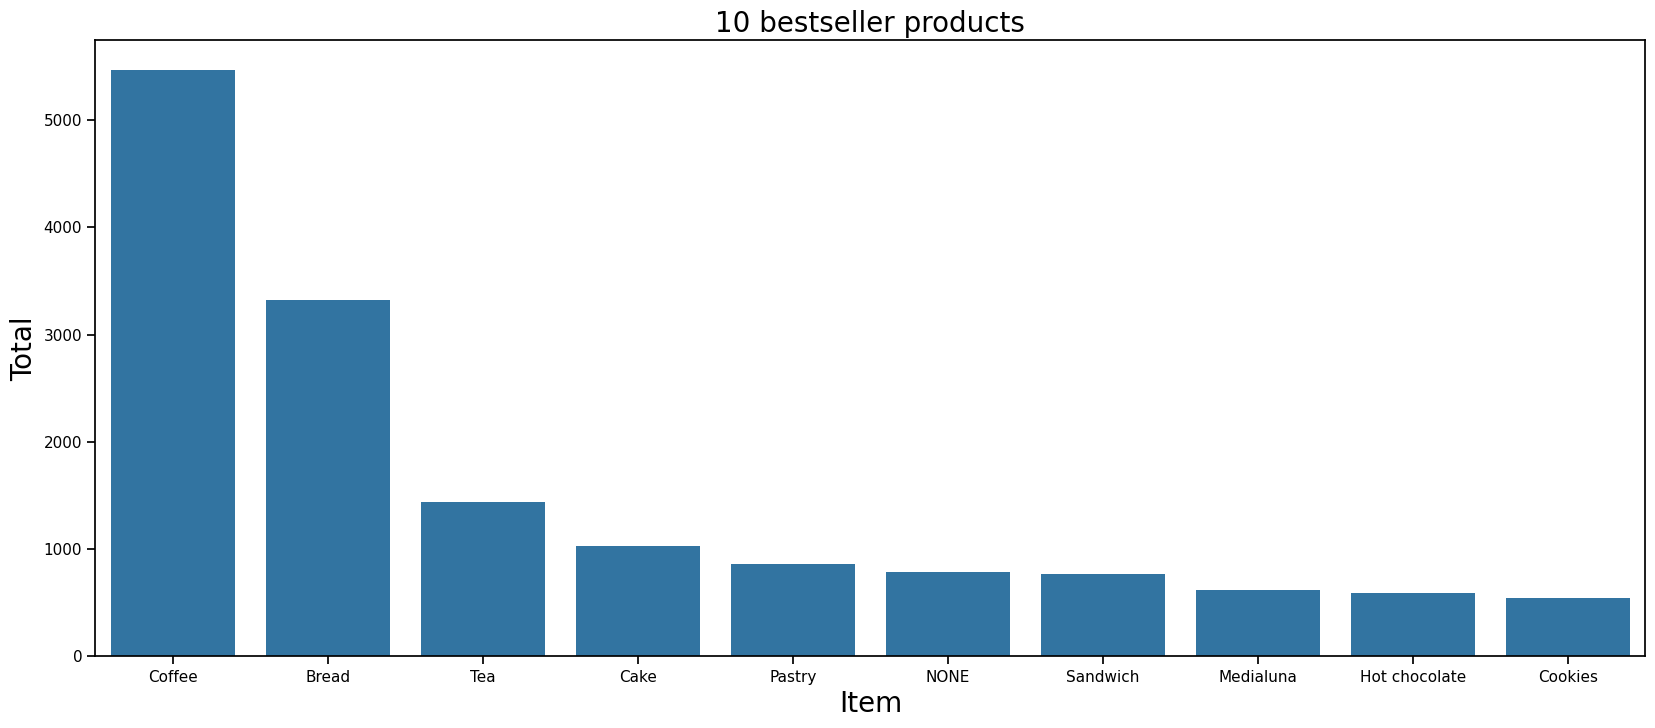

In [7]:
# Select 10 Top Sales and Analyze its patterns
df1 = df.groupby('Item', as_index=True).agg({'Item': 'count'}) \
                .rename(columns={'Item':'Total'})              \
                .reset_index()
df1 = df1.sort_values(by=['Total'], ascending=False)
plt.figure(figsize=(20,8))
df2 = df1.head(10)

sns.set_context("notebook", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.barplot(x='Item', y='Total', data=df2).set_title("10 bestseller products", size=20)

plt.show()

In [8]:
df

,Date,Time,Transaction,Item,Time_stamp
0,10/30/2016,9:58:11,1,Bread,2016-10-30 09:58:11
1,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,10/30/2016,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,10/30/2016,10:07:57,3,Jam,2016-10-30 10:07:57
...,...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee,2017-04-09 14:32:58
21289,4/9/2017,14:32:58,9682,Tea,2017-04-09 14:32:58
21290,4/9/2017,14:57:06,9683,Coffee,2017-04-09 14:57:06
21291,4/9/2017,14:57:06,9683,Pastry,2017-04-09 14:57:06


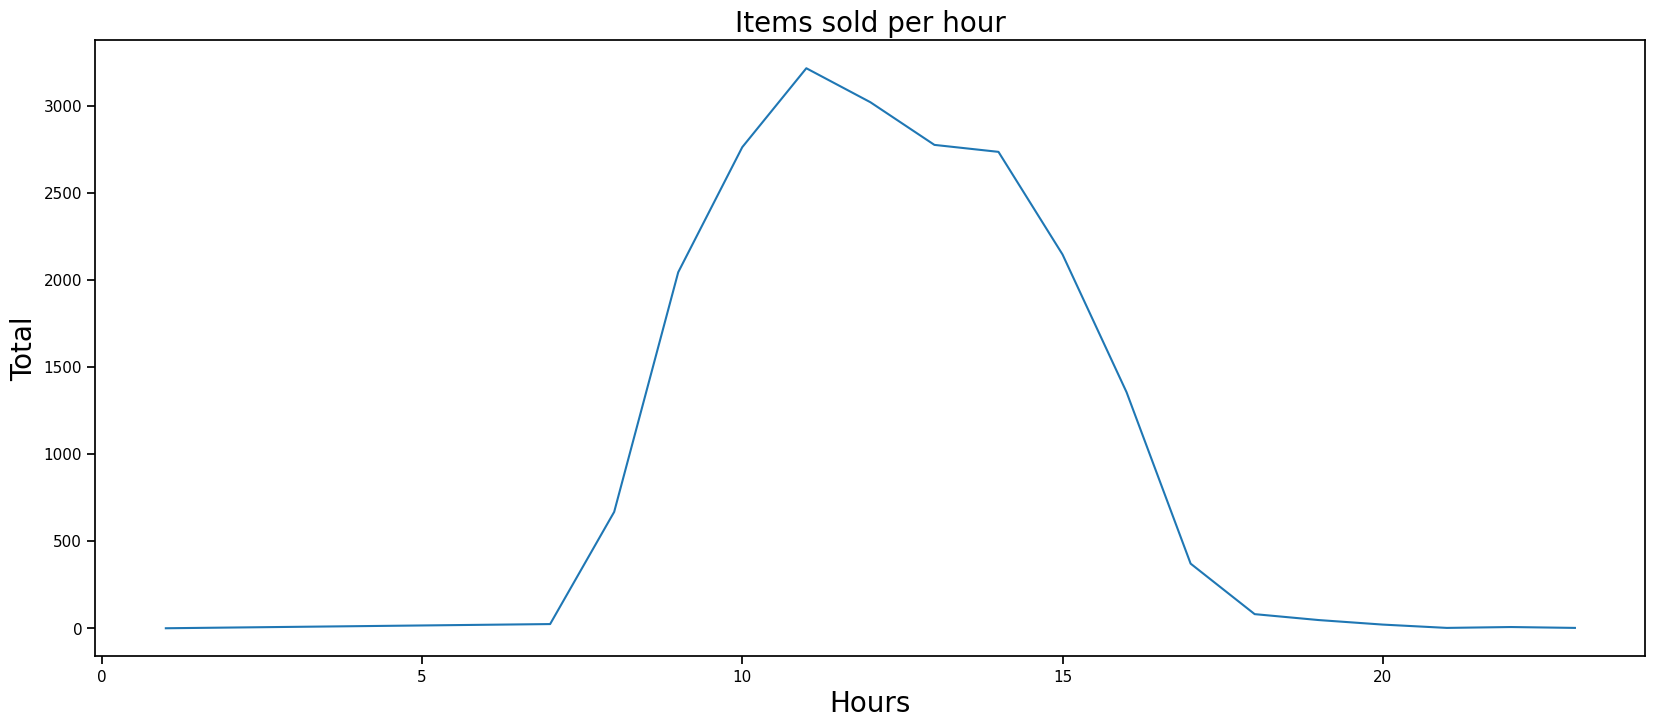

In [9]:
# Analyze shop hours Sales

times = df['Time_stamp']
times = pd.DatetimeIndex(df['Time_stamp'])
grouped = df.groupby([times.hour]).agg({'Item':'count'})                    \
                .rename(columns={'Item':'Total', 'Time_stamp': 'Hour'})     \
                .reset_index()
grouped = grouped.rename(columns={'Time_stamp': 'Hours'})  
plt.figure(figsize=(20,8))
sns.lineplot(x='Hours', y='Total', data=grouped).set_title("Items sold per hour", size=20)

plt.show()

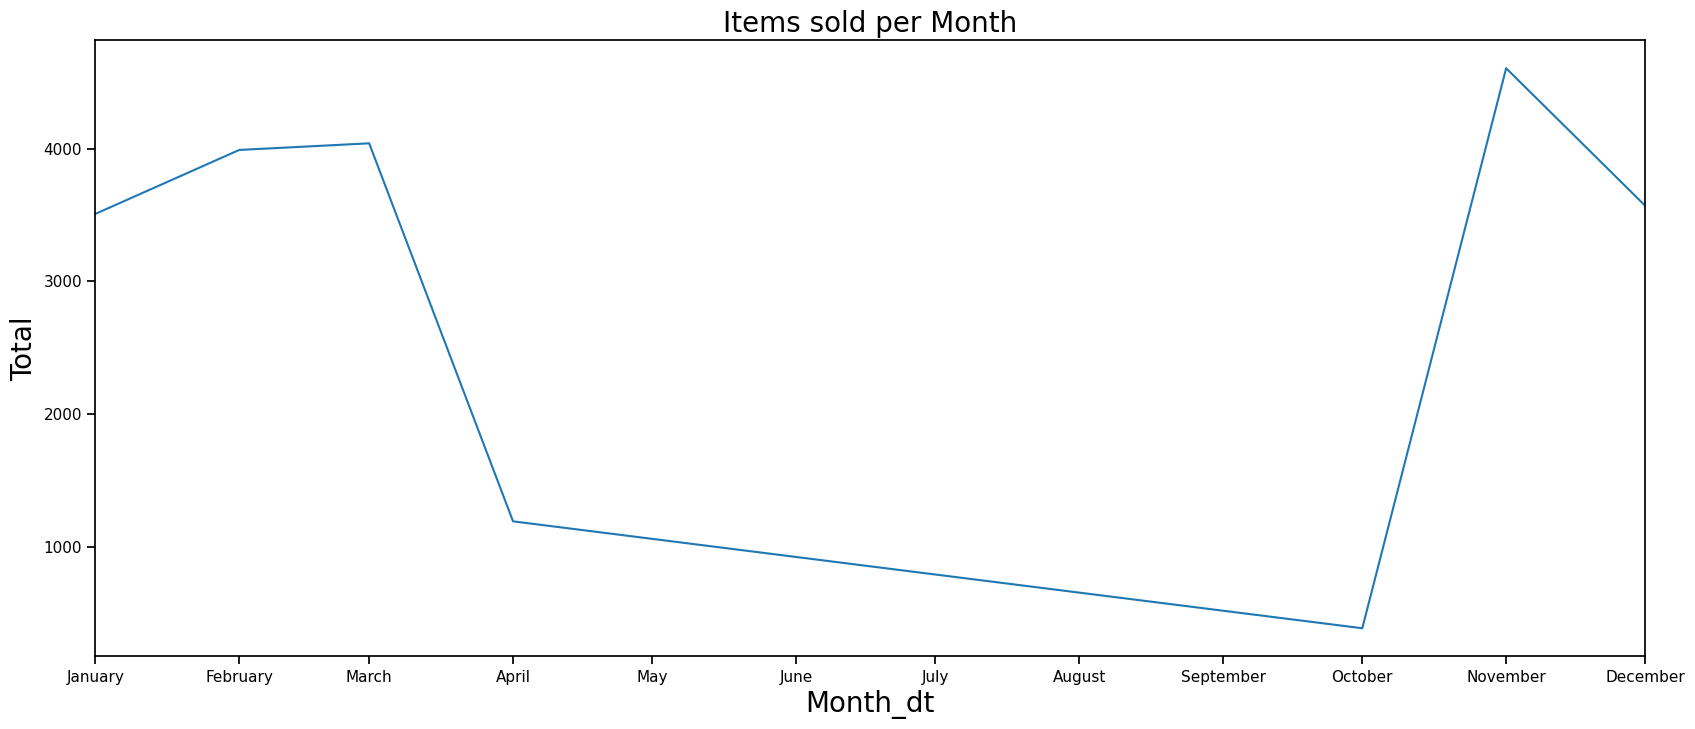

In [10]:
# Seasonality
# Creating season and month columns
# month 
from datetime import datetime
import datetime as dt
import matplotlib.dates as mdates

a = datetime.strptime(("2016-10-30 09:58:11"), '%Y-%m-%d %H:%M:%S')

df['Month_dt'] = df['Time_stamp'].dt.month

grouped_m = df.groupby([times.month]).agg({'Item':'count'})                 \
                .rename(columns={'Item':'Total', 'Time_stamp': 'Month'})     \
                .reset_index()
grouped_m = grouped_m.rename(columns={'Time_stamp': 'Month'}) 
grouped_m['Month_dt'] = pd.to_datetime(grouped_m['Month'], format='%m')
#df['Season']

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

monthFmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(monthFmt)
ax.set_xlim([dt.date(1900, 1, 1), dt.date(1900, 12, 1)])
sns.lineplot(x='Month_dt', y='Total', data=grouped_m).set_title("Items sold per Month", size=20)


plt.show()


In [11]:
df.Time_stamp

0       2016-10-30 09:58:11
1       2016-10-30 10:05:34
2       2016-10-30 10:05:34
3       2016-10-30 10:07:57
4       2016-10-30 10:07:57
                ...        
21288   2017-04-09 14:32:58
21289   2017-04-09 14:32:58
21290   2017-04-09 14:57:06
21291   2017-04-09 14:57:06
21292   2017-04-09 15:04:24
Name: Time_stamp, Length: 21293, dtype: datetime64[ns]

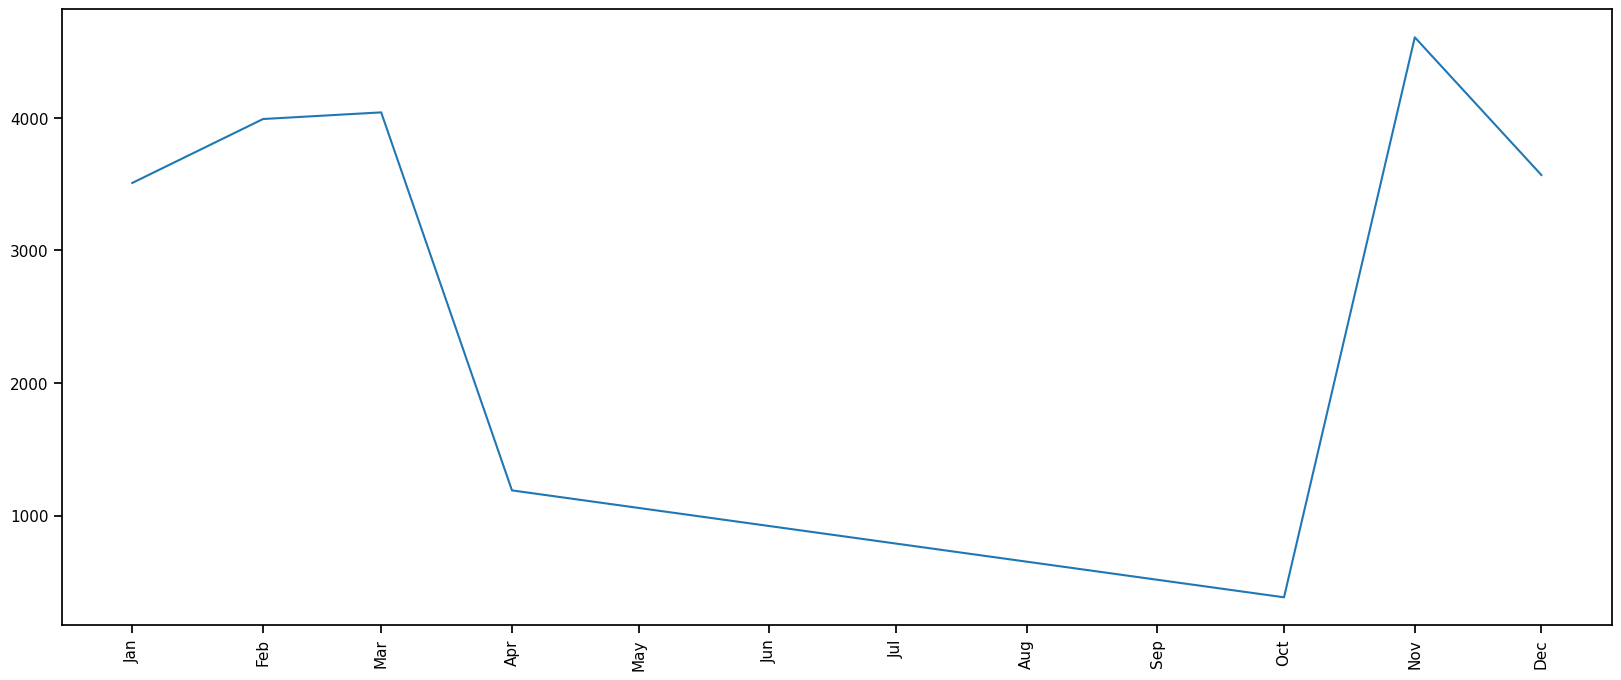

In [12]:
# Another plot example by months
from matplotlib.dates import MonthLocator, DateFormatter

grouped_m['Month'] = pd.to_datetime(grouped_m['Month'], format='%m')

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(111)
plt.plot(grouped_m.Month, grouped_m.Total)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

In [13]:
# Create table for frequency analysis
df.columns

Index(['Date', 'Time', 'Transaction', 'Item', 'Time_stamp', 'Month_dt'], dtype='object')

In [14]:
df_1 =  df.groupby(['Date','Time','Transaction']).agg(lambda m: list(m)).reset_index()
df_1

,Date,Time,Transaction,Item,Time_stamp,Month_dt
0,1/1/2017,1:21:05,4090,[Bread],[2017-01-01 01:21:05],[1]
1,1/10/2017,10:04:39,4454,[Coffee],[2017-01-10 10:04:39],[1]
2,1/10/2017,10:17:08,4455,[Bread],[2017-01-10 10:17:08],[1]
3,1/10/2017,10:52:29,4456,"[Hot chocolate, Pastry, Bread]","[2017-01-10 10:52:29, 2017-01-10 10:52:29, 201...","[1, 1, 1]"
4,1/10/2017,10:58:34,4457,"[Coffee, Cake]","[2017-01-10 10:58:34, 2017-01-10 10:58:34]","[1, 1]"
...,...,...,...,...,...,...
9526,4/9/2017,14:30:09,9681,"[Truffles, Tea, Spanish Brunch, Christmas common]","[2017-04-09 14:30:09, 2017-04-09 14:30:09, 201...","[4, 4, 4, 4]"
9527,4/9/2017,14:32:58,9682,"[Muffin, Tacos/Fajita, Coffee, Tea]","[2017-04-09 14:32:58, 2017-04-09 14:32:58, 201...","[4, 4, 4, 4]"
9528,4/9/2017,14:57:06,9683,"[Coffee, Pastry]","[2017-04-09 14:57:06, 2017-04-09 14:57:06]","[4, 4]"
9529,4/9/2017,15:04:24,9684,[Smoothies],[2017-04-09 15:04:24],[4]


In [15]:
# we show two methods to extend the lists to columns
# This is method 1 - uses pd.Series
Items_expanded_v1 = df1["Item"].apply(pd.Series)
Items_expanded_v1

,0
23,Coffee
11,Bread
84,Tea
15,Cake
66,Pastry
...,...
19,Chicken sand
41,Gift voucher
64,Olum & polenta
72,Raw bars


In [16]:
# This is method 2 list to columns
Items_expanded_v2 = pd.DataFrame(df1.Item.values.tolist()).add_prefix('item_')
Items_expanded_v2

,item_0
0,Coffee
1,Bread
2,Tea
3,Cake
4,Pastry
...,...
90,Chicken sand
91,Gift voucher
92,Olum & polenta
93,Raw bars


In [17]:
# Transform the dataset into a multiple column dataset
df

,Date,Time,Transaction,Item,Time_stamp,Month_dt
0,10/30/2016,9:58:11,1,Bread,2016-10-30 09:58:11,10
1,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
2,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
3,10/30/2016,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,10
4,10/30/2016,10:07:57,3,Jam,2016-10-30 10:07:57,10
...,...,...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee,2017-04-09 14:32:58,4
21289,4/9/2017,14:32:58,9682,Tea,2017-04-09 14:32:58,4
21290,4/9/2017,14:57:06,9683,Coffee,2017-04-09 14:57:06,4
21291,4/9/2017,14:57:06,9683,Pastry,2017-04-09 14:57:06,4


In [18]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.9.1
numpy               1.26.4
pandas              2.2.2
seaborn             0.13.2
session_info        1.0.0
-----
IPython             8.26.0
jupyter_client      8.6.2
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Sep 11 2024, 14:17:37) [GCC 13.2.0]
Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2024-10-13 18:49
